# Student Marks Prediction

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [4]:
df  = pd.read_csv('student_marks.csv')

In [5]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [6]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [9]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

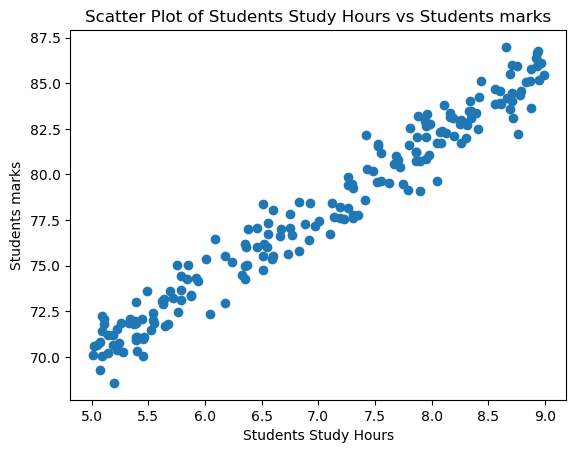

In [10]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms 

In [12]:
# Data Cleaning

In [13]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [14]:
df.study_hours.mean()

6.9959487179487185

In [15]:
df2 = df.fillna(df.study_hours.mean())

In [16]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [17]:
# split dataset

In [18]:
X = df2.drop("student_marks", axis = "columns")
#X = df2.study_hours
y = df2.student_marks

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #, random_state=51

In [20]:
X_train

,study_hours
68,5.07
163,6.75
67,8.26
125,8.75
66,7.86
...,...
51,7.31
5,7.55
105,6.46
33,8.78


In [21]:
y_train

68     69.27
163    77.07
67     81.70
125    85.95
66     81.25
       ...  
51     77.77
5      81.18
105    77.07
33     84.35
64     85.78
Name: student_marks, Length: 160, dtype: float64

In [22]:
X_test

,study_hours
30,8.130000
117,8.830000
46,7.010000
114,7.120000
17,8.440000
54,8.760000
18,8.410000
72,6.350000
90,7.520000
85,5.630000


In [23]:
y_test

30     82.27
117    85.04
46     77.46
114    78.42
17     85.11
54     82.21
18     82.50
72     74.97
90     79.56
85     72.87
193    79.64
141    80.31
16     76.04
119    75.55
120    76.20
2      78.68
102    82.99
61     79.41
45     72.96
177    73.64
189    79.87
82     76.63
99     82.30
32     71.10
74     77.59
6      76.99
41     86.41
168    82.68
139    83.91
128    77.01
9      77.82
166    81.60
21     83.36
10     75.37
95     76.48
73     78.61
107    73.25
93     79.10
29     80.17
171    77.63
Name: student_marks, dtype: float64

# Select a model and train it

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [92]:
import pickle

with open('test', 'wb') as file:
    mod = pickle.dump(lr, file)

In [84]:
lr.coef_

array([3.91070829])

In [27]:
lr.intercept_

50.582467831078674

In [28]:
m = 3.89804485
c = 50.584087316941506
z  = m * 40 + c 
z

206.5058813169415

In [86]:
lr.predict([[40]])

C:\Users\Student\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([207.01079928])

In [30]:
y_pred  = lr.predict(X_test)
y_pred

array([82.3765262 , 85.114022  , 77.99653292, 78.42671083, 83.58884577,
       84.84027242, 83.47152452, 75.41546545, 79.99099414, 72.59975548,
       80.10831539, 79.6390304 , 75.45457253, 76.39314252, 76.08028586,
       77.94158245, 82.88491827, 78.97420999, 74.75064504, 73.22546881,
       78.97420999, 76.62778502, 82.1418837 , 71.70029258, 79.1697454 ,
       76.6668921 , 85.46598574, 81.67259871, 84.21455909, 75.5327867 ,
       76.97974876, 81.08599246, 82.49384745, 76.35403544, 74.39868129,
       79.56081623, 72.95171923, 81.47706329, 79.83456581, 78.70046041])

In [31]:
temp = np.c_[X_test, y_test, y_pred]
temp

array([[ 8.13      , 82.27      , 82.3765262 ],
       [ 8.83      , 85.04      , 85.114022  ],
       [ 7.01      , 77.46      , 77.99653292],
       [ 7.12      , 78.42      , 78.42671083],
       [ 8.44      , 85.11      , 83.58884577],
       [ 8.76      , 82.21      , 84.84027242],
       [ 8.41      , 82.5       , 83.47152452],
       [ 6.35      , 74.97      , 75.41546545],
       [ 7.52      , 79.56      , 79.99099414],
       [ 5.63      , 72.87      , 72.59975548],
       [ 7.55      , 79.64      , 80.10831539],
       [ 7.43      , 80.31      , 79.6390304 ],
       [ 6.36      , 76.04      , 75.45457253],
       [ 6.6       , 75.55      , 76.39314252],
       [ 6.52      , 76.2       , 76.08028586],
       [ 6.99594872, 78.68      , 77.94158245],
       [ 8.26      , 82.99      , 82.88491827],
       [ 7.26      , 79.41      , 78.97420999],
       [ 6.18      , 72.96      , 74.75064504],
       [ 5.79      , 73.64      , 73.22546881],
       [ 7.26      , 79.87      , 78.974

In [32]:
pd.DataFrame(data = np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.130000,82.27,82.376526
1,8.830000,85.04,85.114022
2,7.010000,77.46,77.996533
3,7.120000,78.42,78.426711
4,8.440000,85.11,83.588846
5,8.760000,82.21,84.840272
6,8.410000,82.50,83.471525
7,6.350000,74.97,75.415465
8,7.520000,79.56,79.990994
9,5.630000,72.87,72.599755


## Fine-tune your model

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
mean_squared_error(y_test,y_pred)

0.992280940082761

In [36]:
r2_score(y_test,y_pred)

0.9265416467798774

In [37]:
lr.score(X_test,y_test)

0.9265416467798774

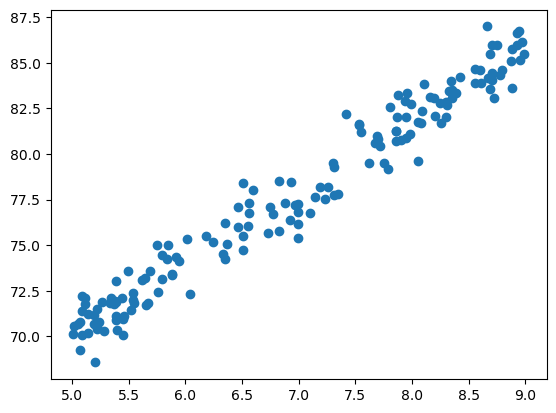

In [38]:
plt.scatter(X_train,y_train)  

In [39]:
lr.predict(X_train)

array([70.40975884, 76.97974876, 82.88491827, 84.80116533, 81.32063496,
       82.61116869, 85.30955741, 70.56618717, 75.41546545, 83.15866785,
       71.66118549, 71.89582799, 73.22546881, 73.06904048, 76.23671419,
       85.66152116, 81.12509955, 81.32063496, 77.29260543, 81.78991995,
       83.5106316 , 70.68350842, 73.73386089, 73.22546881, 71.85672091,
       81.71170579, 73.42100422, 77.94158245, 81.04688538, 84.05813076,
       79.32617373, 83.23688202, 77.84010459, 74.98528754, 78.34849666,
       70.68350842, 70.21422343, 80.65581455, 72.24779174, 80.69492163,
       77.68367625, 76.04117877, 70.48797301, 74.75064504, 80.57760039,
       77.64456917, 72.67796965, 74.08582463, 72.16957757, 84.25366617,
       70.87904384, 77.29260543, 72.83439798, 85.50509283, 81.63349162,
       71.89582799, 72.28689882, 70.40975884, 76.9015346 , 84.56652284,
       82.65027578, 82.22009787, 81.32063496, 71.66118549, 70.91815092,
       82.18099078, 71.23100758, 70.87904384, 76.19760711, 70.48

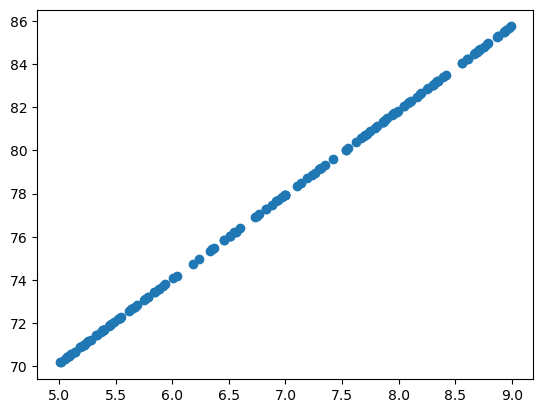

In [40]:
plt.scatter(X_train, lr.predict(X_train))

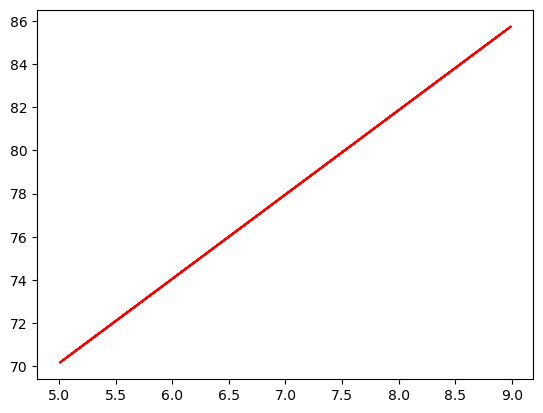

In [41]:
plt.plot(X_train, lr.predict(X_train), 'r-')

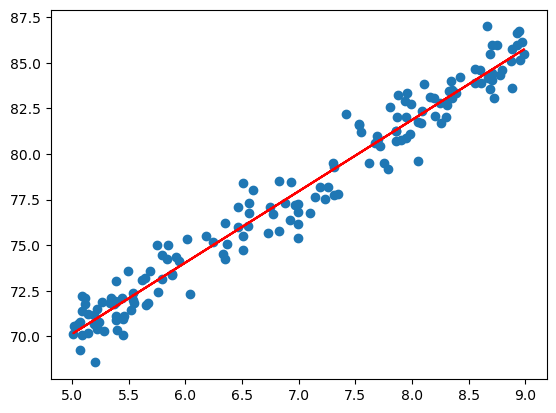

In [42]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

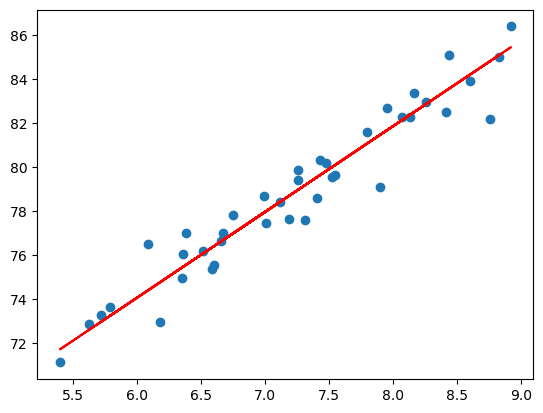

In [43]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

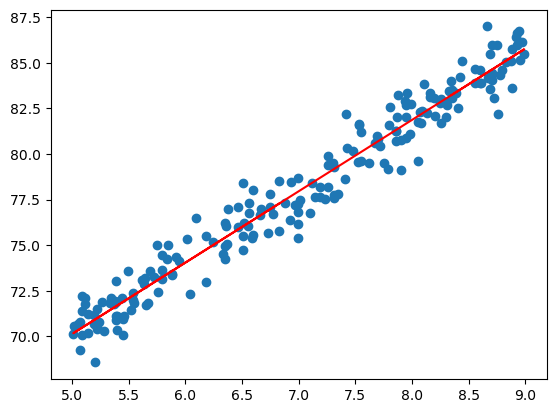

In [44]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")